# **Data Science Internship at CodSoft:**

# **DEC Batch A19**

# **Author: Sheikh Muzammil Ahmed**

# **Task no 1:  Titanic Survival Prediction**

# ***Importing Libraries:***

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# ***Importing CSV:***

In [ ]:
survival_data = pd.read_csv("https://raw.githubusercontent.com/MuzammilAhmed14/CodSoft/main/tested.csv")

# ***Reading CSV:***

In [ ]:
print("Data imported successfully")
survival_data

Data imported successfully


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## ***Data Exploration and Summary Statistics:***

In [ ]:
print("Summary Statistics Table:")
survival_data.describe()

Summary Statistics Table:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# Check the shape of the dataset
print("Shape of the dataset:", survival_data.shape)

Shape of the dataset: (418, 12)


In [ ]:
# Check for missing values
print("Missing values in each column:\n")
print(survival_data.isnull().sum())

Missing values in each column:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
# Print information about the dataset
print("Information about the dataset:\n")
print(survival_data.info())

Information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [ ]:
# Print the number of unique values in each column
print("Number of unique values in each column:\n")
print(survival_data.nunique())

Number of unique values in each column:

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64


# ***Dropping Columns:***

In [ ]:
print("Dropping irrelevant columns from dataset: ")
if 'Unnamed: 0' in survival_data.columns:
    # Drop 'Unnamed: 0' column
    survival_data = survival_data.drop(['Unnamed: 0'], axis=1)

# Drop other irrelevant columns
survival_data = survival_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

Dropping irrelevant columns from dataset: 


# ***Handle missing values:***

In [ ]:
# Handling missing values for numerical columns
numerical_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
imputer = SimpleImputer(strategy='mean')
survival_data[numerical_columns] = imputer.fit_transform(survival_data[numerical_columns])

# Drop remaining rows with missing values
survival_data = survival_data.dropna()

# ***Random Forest Algorithm:***

In [ ]:
# Selecting columns for modeling
selected_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']

# Separate features (X) and target variable (y)
X = survival_data[selected_columns]
y = survival_data['Survived']

# Handle categorical variables with one-hot encoding
X_encoded = pd.get_dummies(X, columns=['Sex'], drop_first=True)  # Drop_first to avoid multicollinearity

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)


# **Visualize Accuracy:**

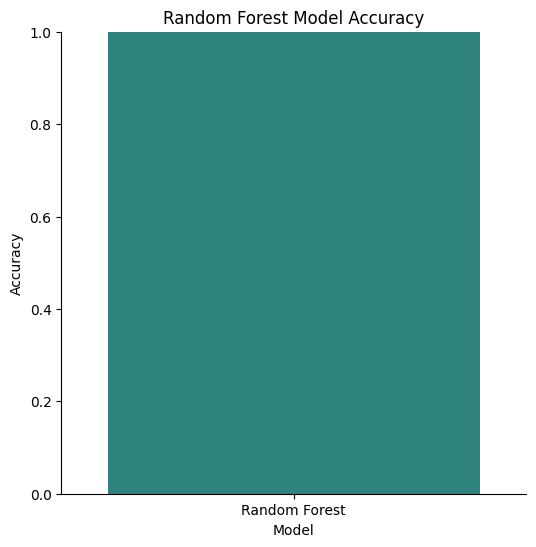

In [ ]:
models = ['Random Forest']
accuracy_values = [accuracy_rf]
data = {'Model': models, 'Accuracy': accuracy_values}
df = pd.DataFrame(data)
plt.figure(figsize=(6, 6))
sns.barplot(x='Model', y='Accuracy', data=df, palette="viridis")
plt.title('Random Forest Model Accuracy')
plt.ylim(0, 1)
sns.despine()
plt.show()

# ***Visualization Confusion Matrix:***

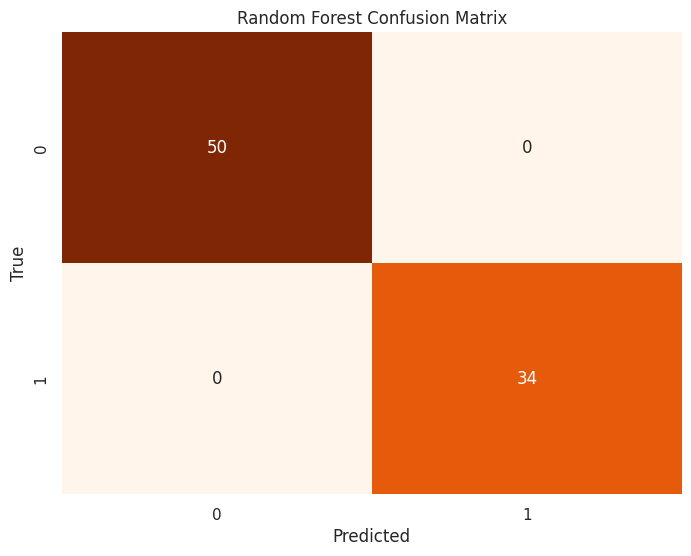

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ***Visualization Classification Report:***

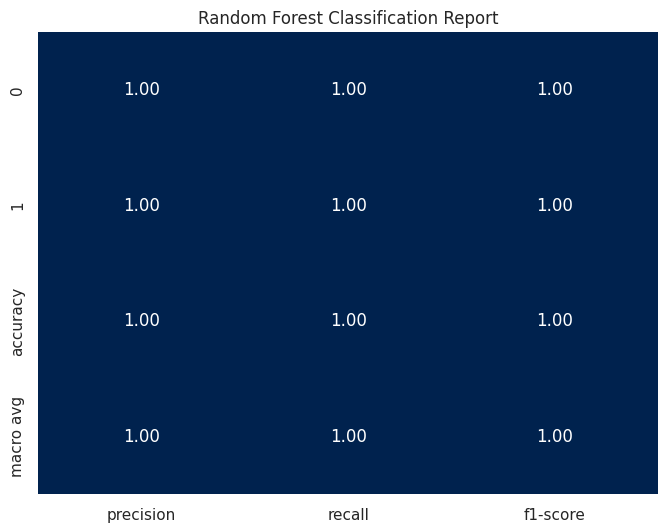

In [ ]:
classification_rep_rf_df = pd.DataFrame.from_dict(classification_report(y_test, y_pred_rf, output_dict=True)).T
plt.figure(figsize=(8, 6))
sns.heatmap(classification_rep_rf_df.iloc[:-1, :-1], annot=True, cmap='cividis', fmt=".2f", cbar=False)
plt.title('Random Forest Classification Report')
plt.show()

# ***Prediction:***

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


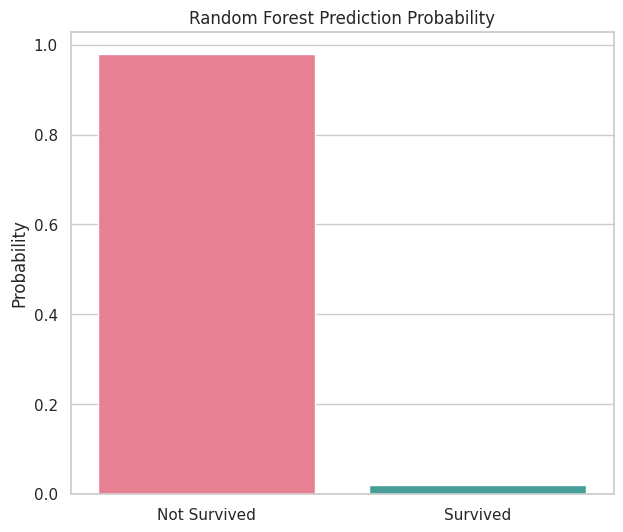

In [ ]:
# Example data for prediction: Pclass, Age, SibSp, Parch, Fare, Sex
example_data_rf = [[3, 25, 1, 0, 7.5, 1]]

prediction_rf = rf_model.predict(example_data_rf)
plt.figure(figsize=(7, 6))

# Visualization: Prediction Probability
sns.barplot(x=['Not Survived', 'Survived'], y=rf_model.predict_proba(example_data_rf)[0], palette='husl')
plt.title('Random Forest Prediction Probability')
plt.ylabel('Probability')
plt.show()
